# Forest Cover Type

Melia Miller

March 27, 2019
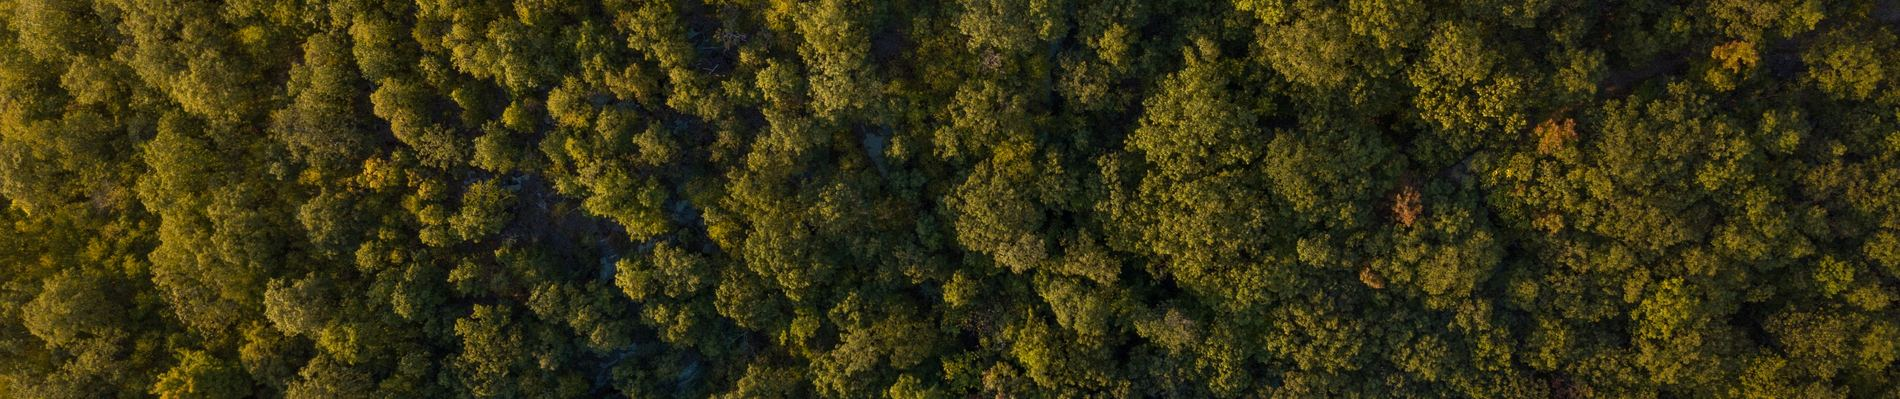

# Introduction

### Problem statement

The goal of this Capstone is to predict the forest cover type of an area in the Roosevelt National Forest of northern Colorado. While the study is limited to one specific national forest, the results and insights may be used for other National Forests, National Parks, and wilderness areas in and outside of the United States. This information can be used to track the health of forests, which forests are stable or growing/shrinking, and how forest types change over time. This may have far-reaching implications related to climate change, human expansion, and carbon dioxide levels. In addition, feature importance can be used to determine what factors influence the forest type in a given area.   

Decision trees to be used to make decisions about actual trees! Initially, this dataset was collected to help accurately estimate natural resource inventory. This not only has the potential to have a global impact on estimating the type and area of forests, but also business implications for logging. If tools are available to predict the composition of wilderness areas and specifically the tree type; this information can be used to make decisions on which trees to cut, log, and sell, and which trees to plant again in the future.

The goal for the final product is a simple interactive user-interface to understand the models and different features. In the future, the model could be expanded to include more wilderness areas to better understand forest ecosystems and ecological processes.

Blackard, Jock A. and Denis J. Dean. 2000. "Comparative Accuracies of Artificial Neural Networks and Discriminant Analysis in Predicting Forest Cover Types from Cartographic Variables." Computers and Electronics in Agriculture 24(3):131-151.

https://pdfs.semanticscholar.org/42fd/f2999c46babe535974e14375fbb224445757.pdf

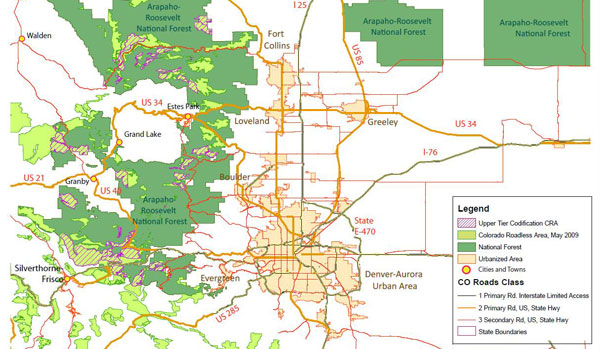

### Data Source

This data has been aggregated from US Geological Survey and US Forest Service (USFS) Region 2 Resource Information System data and includes forest types (Cover_Type) such as Spruce/Fir, Lodgepole Pine, Ponderosa Pine, Cottonwood/Willow, Aspen, Douglas-fir, and Krummholz. There are 12 cartographic variables. The cartographic variables are Elevation, Aspect in degrees azimuth, Slope in degrees, Horizontal_Distance_To_Hydrology (horizontal distance to nearest surface water features), Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am (0 to 255 index at summer solstice), Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points (distance to nearest wildfire ignition points), Wilderness_Area, and Soil_Type. There are four different Wilderness areas and 40 soil types. 

The dataset was put together by UCI and was used as a Kaggle competition 2015; the data files can be downloaded from Kaggle. The data set as over 15,000 rows.

https://www.kaggle.com/c/forest-cover-type-kernels-only

https://archive.ics.uci.edu/ml/datasets/covertype


### Techniques to use for modeling

I anticipate I will be using many supervised learning techniques such as k-Nearest Neighbors, Support Vector Machines, Decision Tree and Random Forest, and neural networks for this classification problem.

I will use some unsupervised learning techniques such as k-means and mean shift clustering to get groupings. I will also use the soil type text descriptions as features to compare to baseline models.


### Plan of action

The plan for my data pipeline is to start with an exploration of the variables (determine value counts, check for missingness, do any data cleaning, describe, make histograms, check for outliers, determine correlation matrix, check for balances in outcome variable), I will then make many classification models including (kNN, SVM, logistic regression, random forest, and neural networks using Keras). I will evaluate each model using a classification report, and a confusion matrix. Final steps will be to determine important features, compare models based on their predictions and computational complexity, and create visuals to explain predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
sns.set(style="darkgrid")

%matplotlib inline

In [2]:
# first load up the data and take a peek

df = pd.read_csv('train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.describe()
# no missingness

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


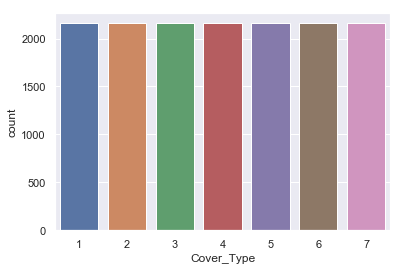

In [4]:
sns.countplot(x='Cover_Type', data=df)
plt.show()
# perfectly balanced outcome classes

In [5]:
# create dataframe with 10 non-binary variables
df10 = df.iloc[:, 1:11]
df10.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


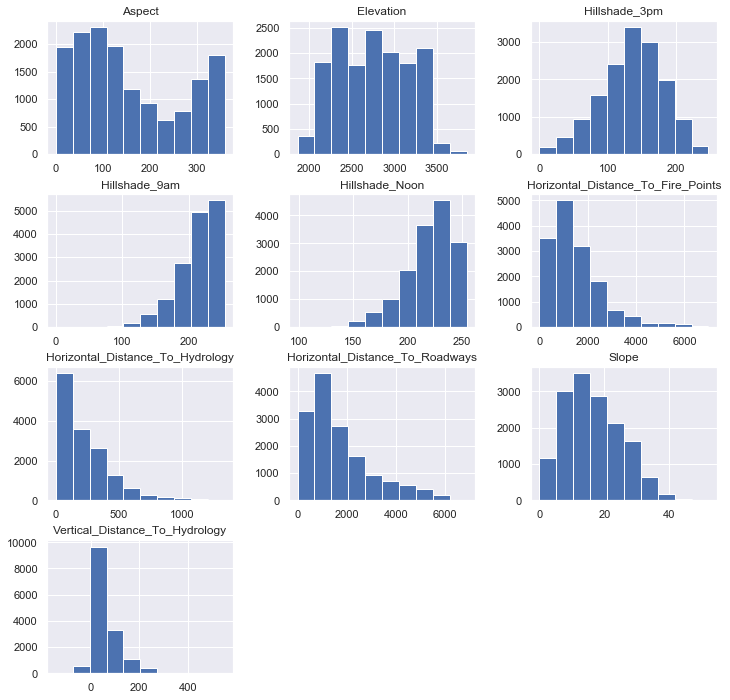

In [6]:
# plot histgram of 10 columns
df10.hist()
plt.gcf().set_size_inches(12, 12)
plt.show()

# almost no normal distributions - ha, what fun!

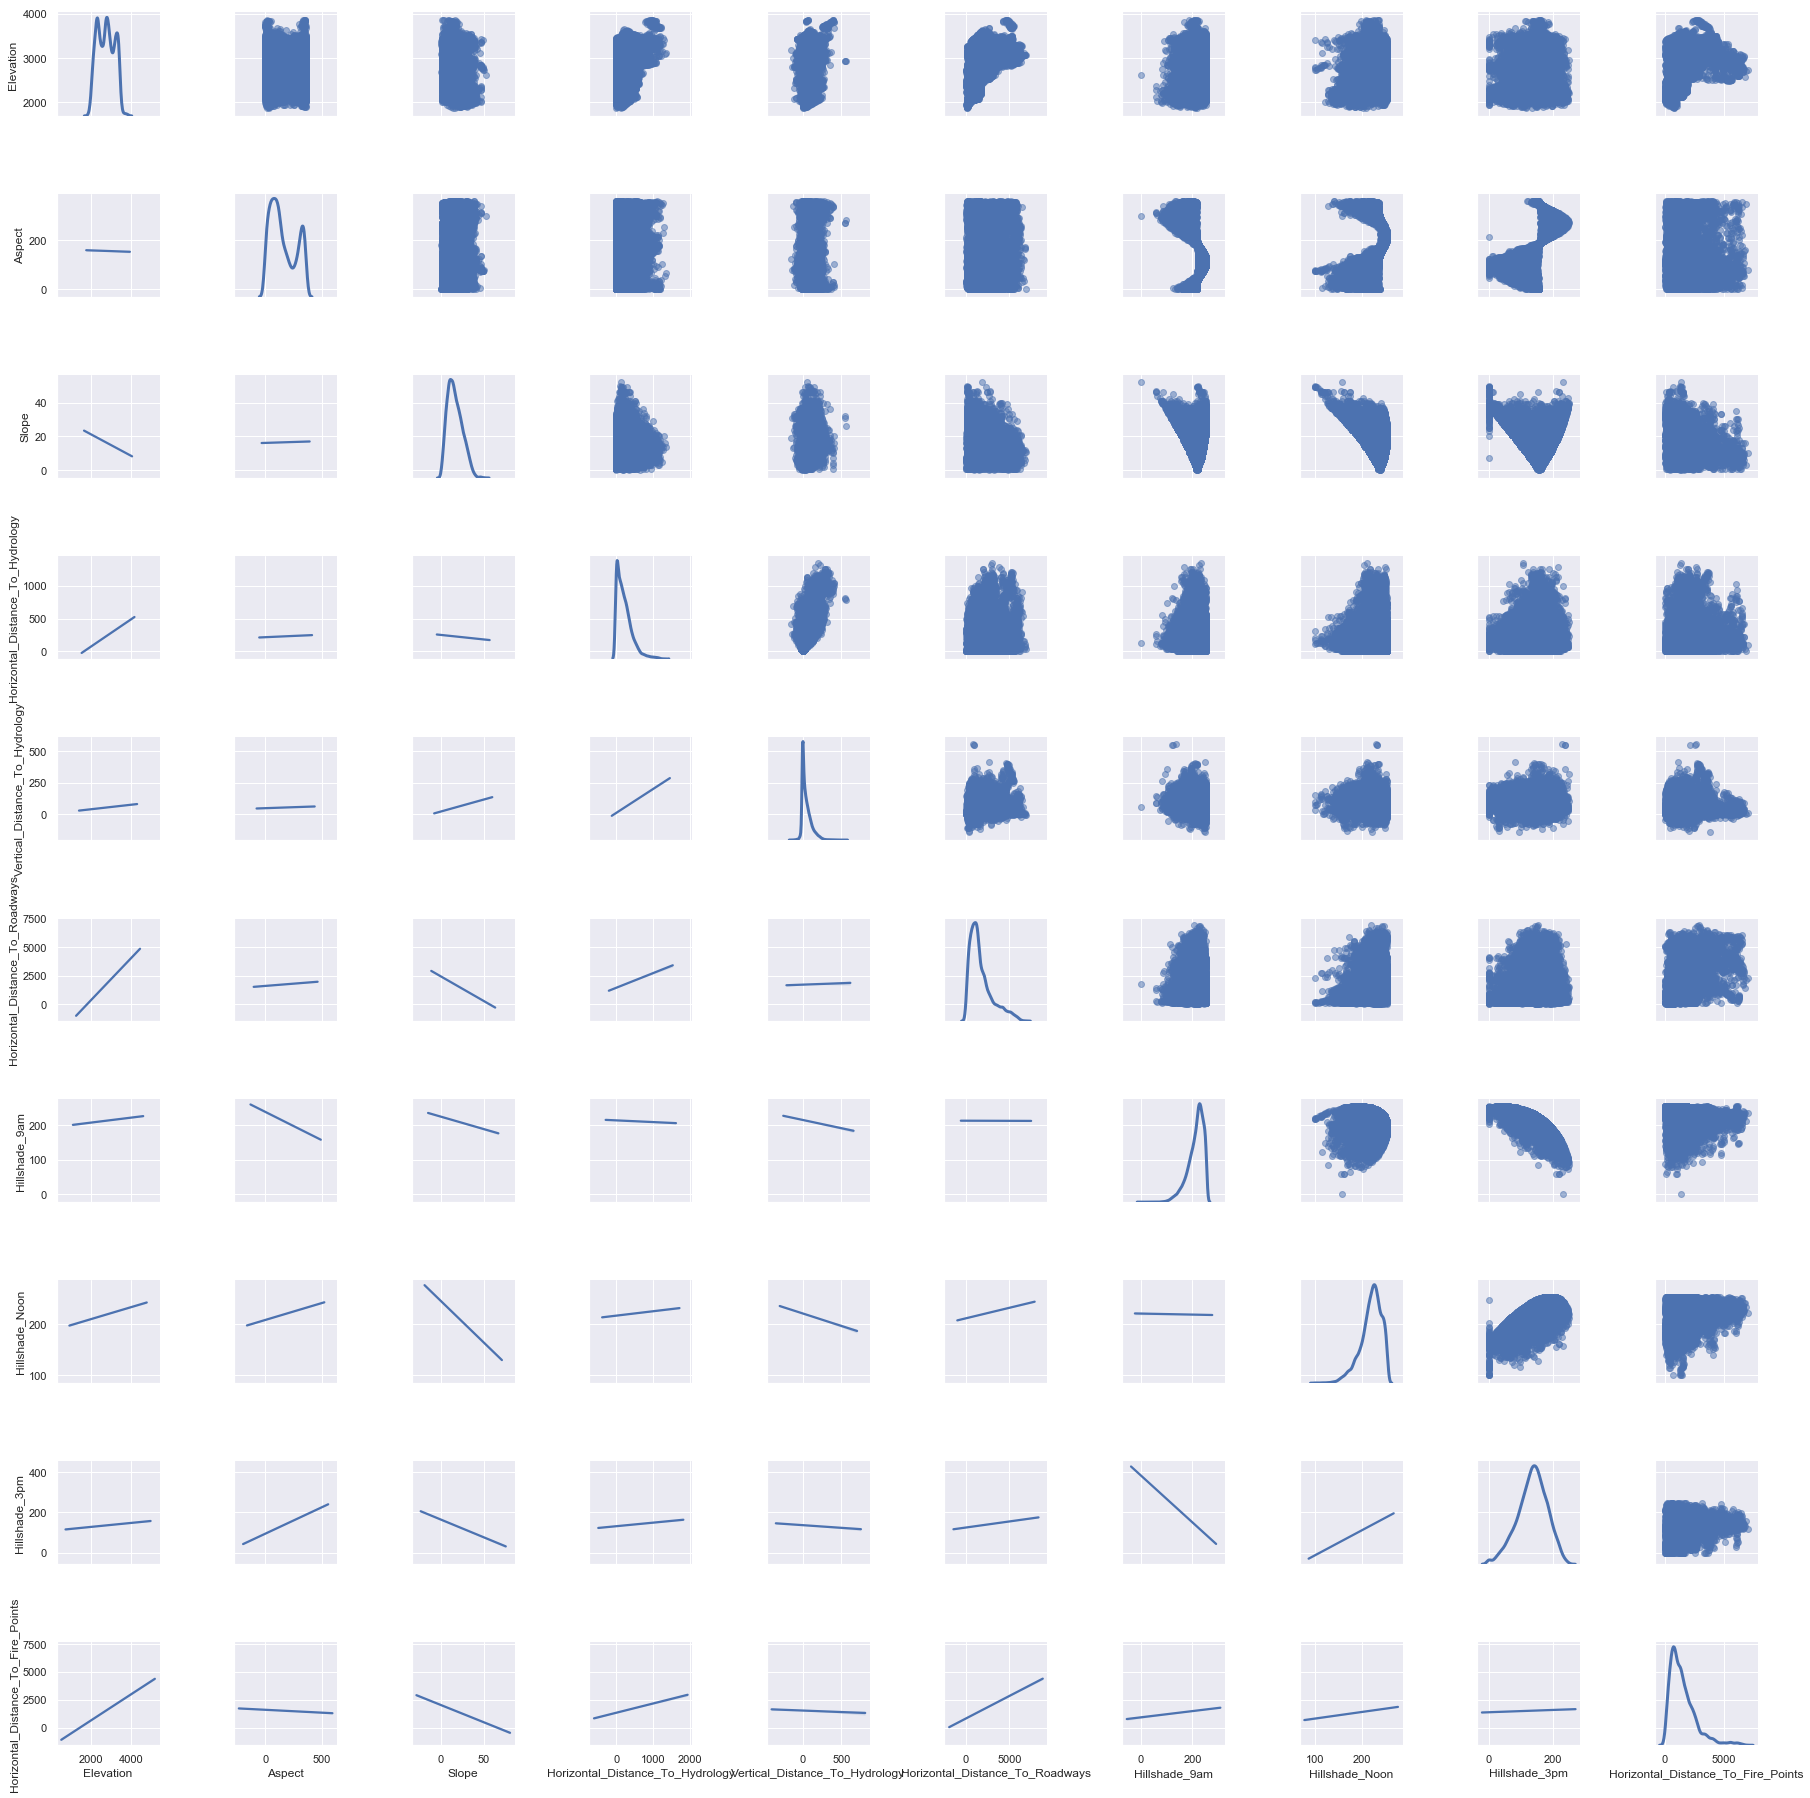

In [7]:
# look at distribution and correlation between variables all in one for 10 columns
g = sns.PairGrid(df10, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

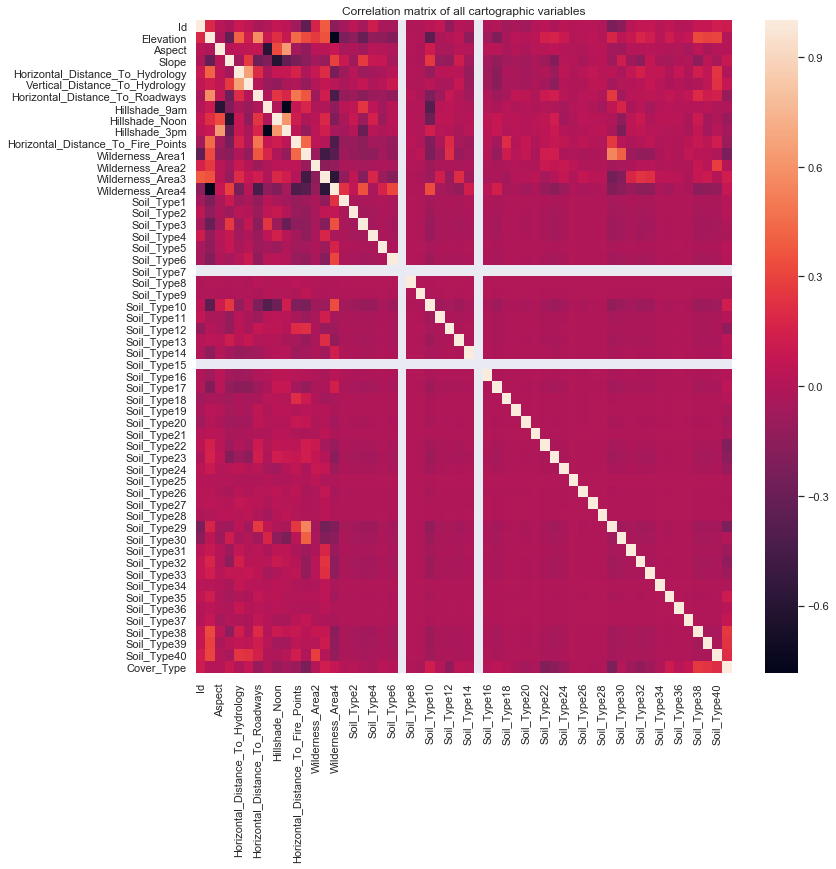

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())
plt.title('Correlation matrix of all cartographic variables')
plt.show()

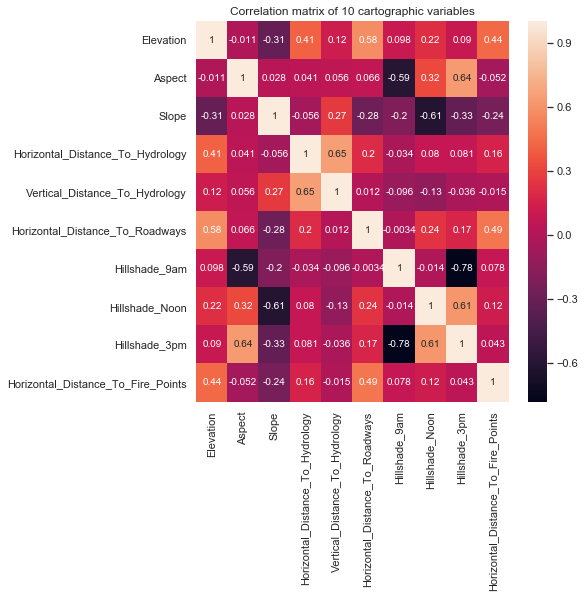

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(df10.corr(), annot=True)
plt.title('Correlation matrix of 10 cartographic variables')
plt.show()

Boxplots of 10 cartographic variables


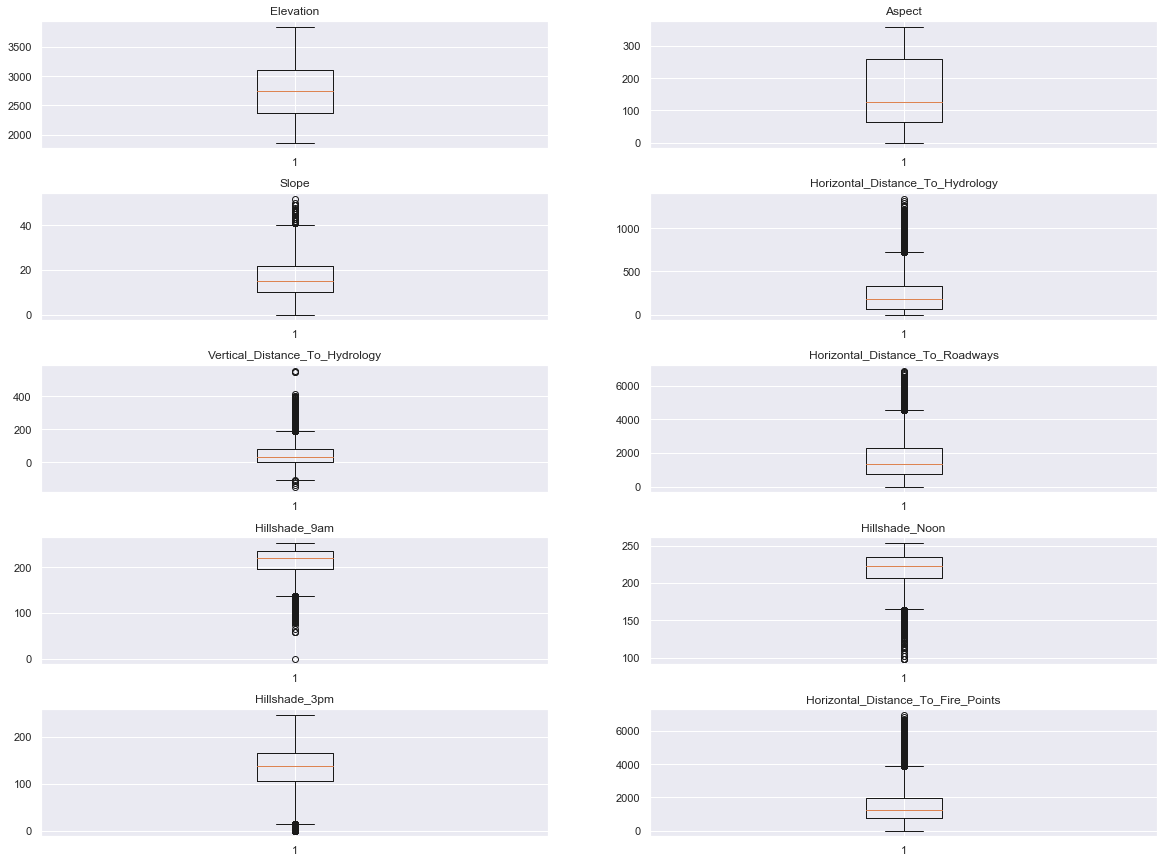

In [10]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.35)

df10.columns
print('Boxplots of 10 cartographic variables')
for i, col in zip(range(1, 11), df10.columns):
    plt.subplot(5, 2, i)
    plt.boxplot(df10[col])
    plt.title(col)
plt.show()

In [11]:
# get soil type and wild areas into one column instead of 40 and 4 respectively - for visuals
df_soil_types = df.iloc[:, 15:55]
df_soil_types['soil_types'] = df_soil_types.idxmax(axis=1)

df_wilderness_area = df.iloc[:, 11:15]
df_wilderness_area['wild_areas'] = df_wilderness_area.idxmax(axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
df['soil_types'] = df_soil_types['soil_types']
df['wild_areas'] = df_wilderness_area['wild_areas']

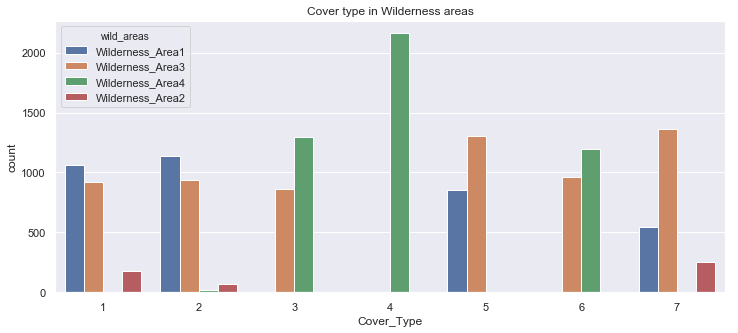

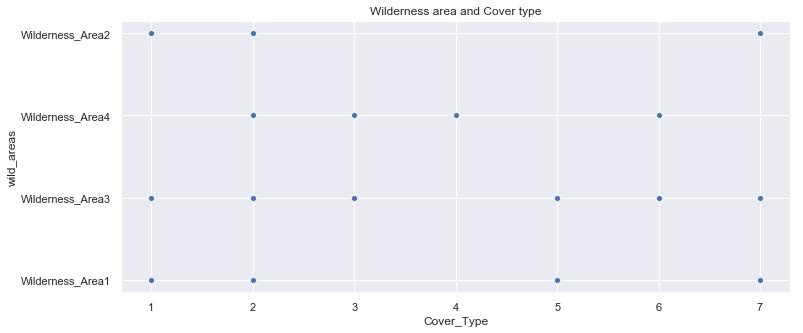

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='Cover_Type', hue='wild_areas', data=df)
plt.title('Cover type in Wilderness areas')
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='Cover_Type', y='wild_areas', data=df)
plt.title('Wilderness area and Cover type')
plt.show()

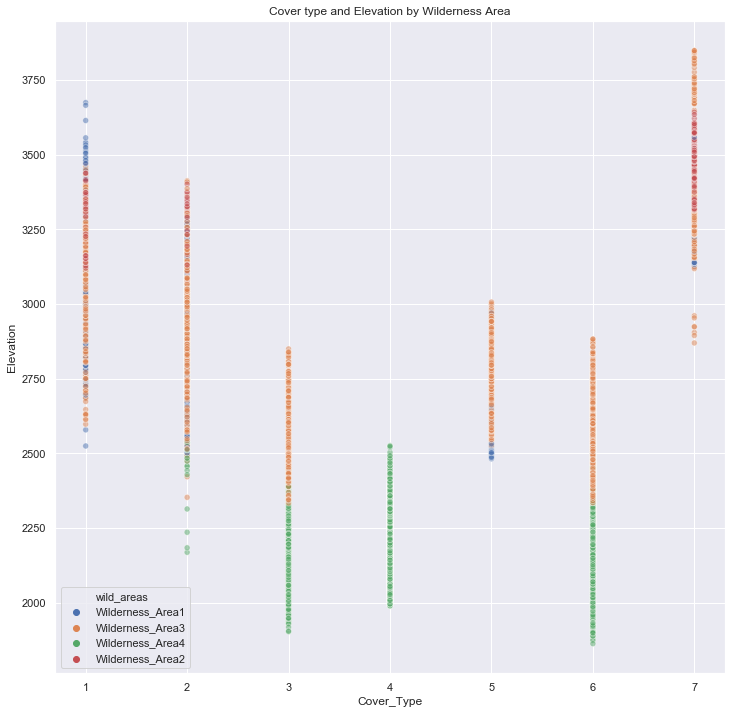

In [14]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Cover_Type', y='Elevation', hue='wild_areas', data=df, alpha=0.5)
plt.title('Cover type and Elevation by Wilderness Area')
plt.show()

In [15]:
df.Cover_Type.unique()

array([5, 2, 1, 7, 3, 6, 4])

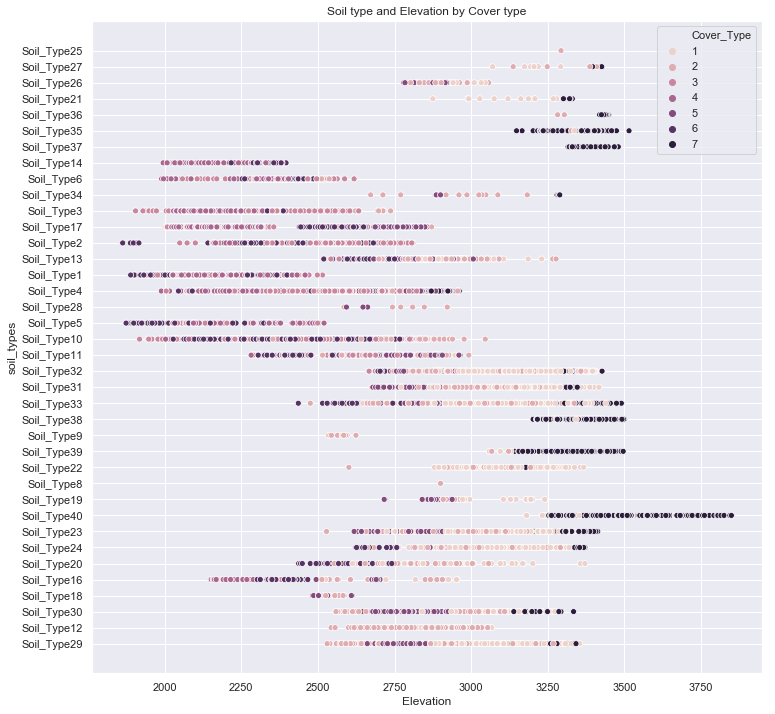

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Elevation', y='soil_types', legend='full', hue='Cover_Type', data=df)
plt.title('Soil type and Elevation by Cover type')
plt.show()

# plt.figure(figsize=(5,12))
# sns.scatterplot(x='Cover_Type', y='soil_types', hue='Elevation', data=df, 
#                 palette='Blues')
# plt.title('Soil type and Cover type by Elevation')
# plt.show()

# plt.figure(figsize=(12,12))
# sns.scatterplot(x='Elevation', y='soil_types', style='wild_areas', data=df)
# plt.title('Soil type and Elevation by Wilderness Areas')
# plt.show()

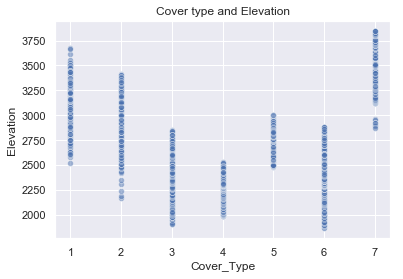

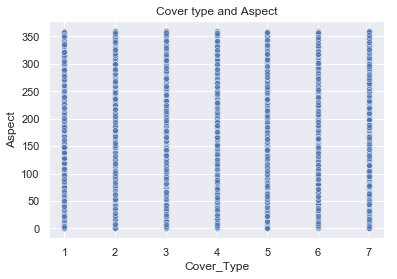

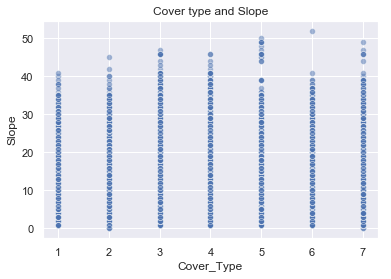

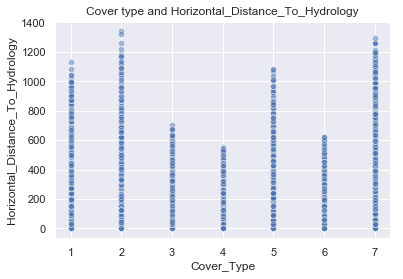

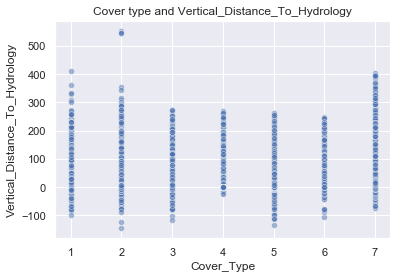

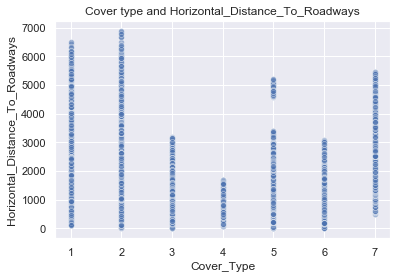

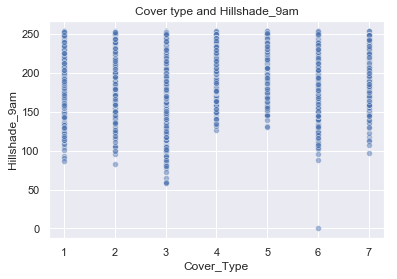

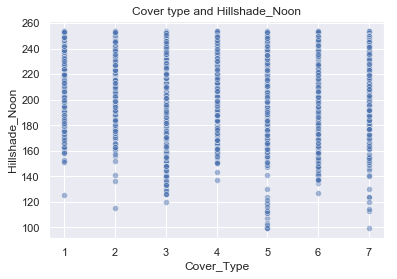

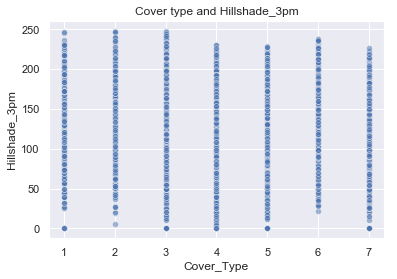

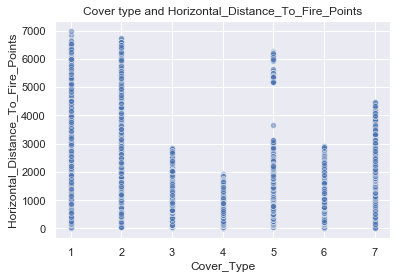

In [17]:
for col in df10.columns:
    sns.scatterplot(x='Cover_Type', y=col, data=df, alpha=0.5)
    plt.title(f'Cover type and {col}')
    plt.show()

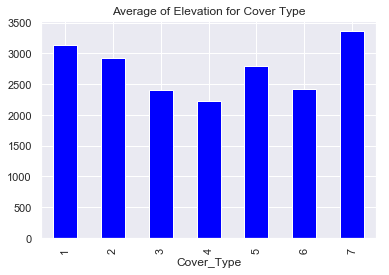

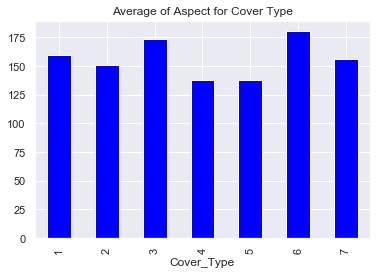

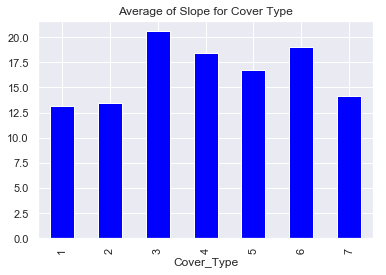

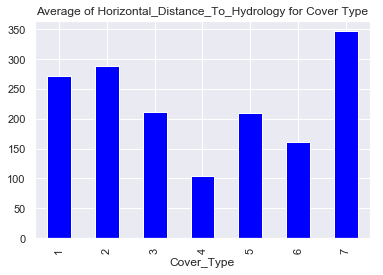

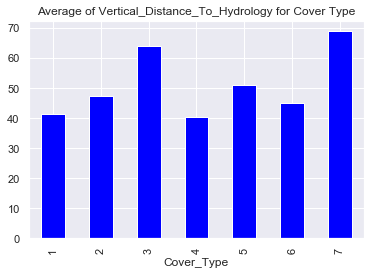

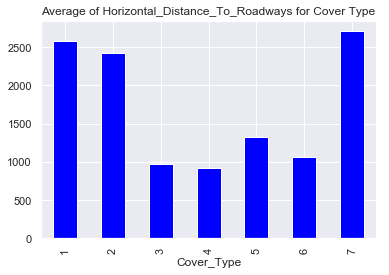

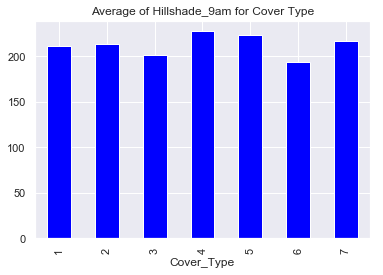

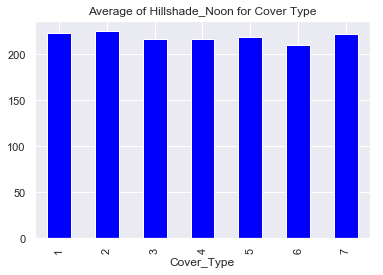

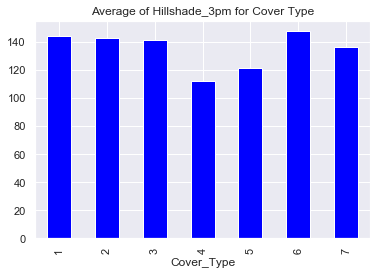

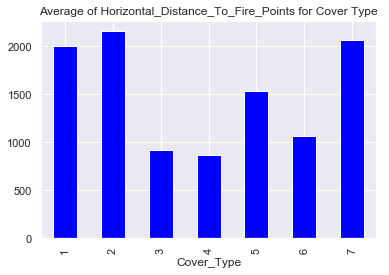

In [18]:
for col in df10.columns:
    df.groupby(['Cover_Type'])[col].mean().plot(kind='bar', color='blue')
    plt.title(f'Average of {col} for Cover Type')
    plt.show()

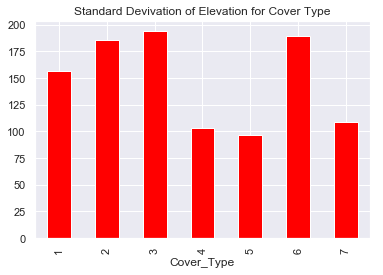

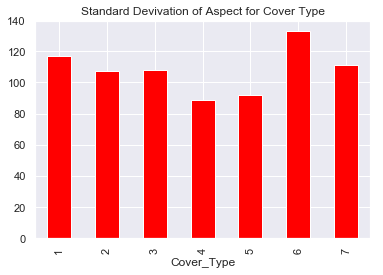

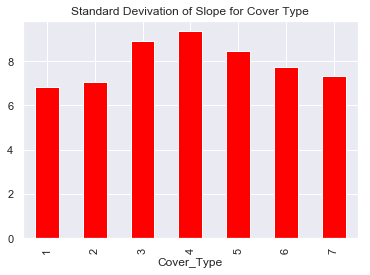

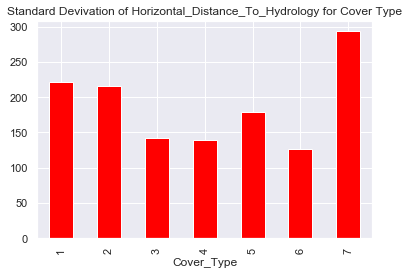

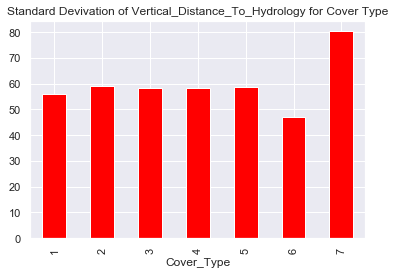

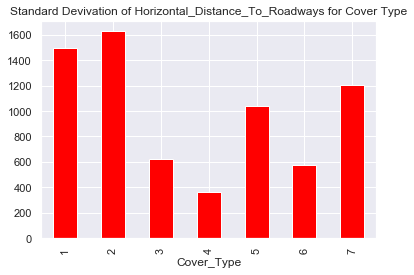

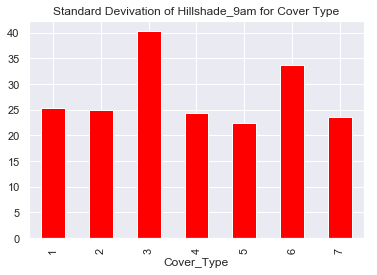

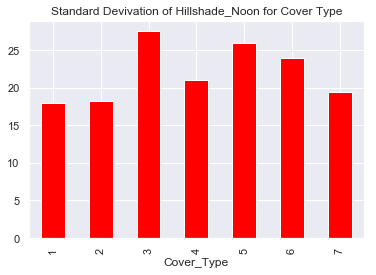

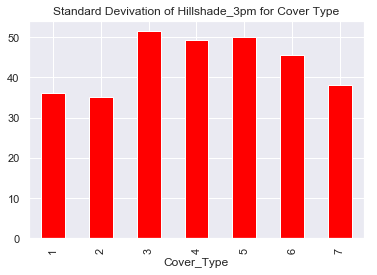

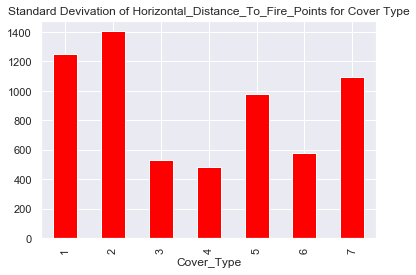

In [19]:
for col in df10.columns:
    df.groupby(['Cover_Type'])[col].std().plot(kind='bar', color='red')
    plt.title(f'Standard Devivation of {col} for Cover Type')
    plt.show()

## Summary of cartographic variables and visualizations

First off, we can take note that the dataset is balanced between all seven cover types with 2160 counts in each forest cover type. There is no missingness and all data types to start are numeric. There are 4 binary variables for wilderness areas and 40 binary variables for soil types.

First, we look at the histograms of the 10 non-binary variables. Overall, the variables are not very normal. Aspect looks bimodal; Hillshape_3pm, Slope, and Vertical_Distance_To_Hydrology are the closest to normal. Others are skewed; Hillshade_9am and Hillshade_Noon are left skewed, while the last variables are right-skewed. 

The Pairplot confirms the distributions from the histograms and shows correlations between these 10 cartographic variables. The correlation matrix of the 10 cartographic variables shows 
Horizonatal_Distance_To_Roadways and Elevation, Vertical_Distance_To_Hydrology and  Horizonatal_Distance_To_Hydrology, and Hillshade_Noon and Hillshape_3pm have positive correlations above 0.5. Hillshape_9am and Aspect, Hillshade_Noon and Slope, and Hillshape_3pm and Hillshape_9am have negative correlations above -0.5 where Hillshape_3pm and Hillshape_9am have the strongest correlation of -0.78.

The boxplot confirms skewness of Horizonatal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizonatal_Distance_To_Roadways, Hillshade_9am,  Hillshade_Noon, and Horizonatal_Distance_To_Fire_Points and shows outliers for these variables as well as Slope and Hillshape_3pm.

Lastly, we look at some visualizations of specific variables and cover type to see if we can identify any groupings or other useful information. For example, in looking at Cover_Type and Wilderness Area we can see that out of the 7 cover types, most have at least 2 Wilderness Areas while Cover_Type4 only has one, and Cover_Type1 and Cover_Type7 have 3 and Cover_Type2 has all four Wilderness Areas. Similar plots for Soil_Type are not shown because there is a lot going on and it is difficult to make any sense of the visuals. Looking at Elevation, Cover_Type, Wilderness areas, and Soil type we can see that there are not really any obvious groupings. One goal is to use k-means to identify groupings to use as a feature for our models.

## Building some models

After looking at stats and some visuals of the cartographic variables, we are going to build some supervised learning models, tune parameters to increase accuracy, and compare the models to each other.

In [ ]:
# now we are going to make y binary for class 2 or no
X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = np.where(df.Cover_Type == 2, 1, 0)
y.head()

In [21]:
X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.value_counts())
print(y_test.value_counts())
# training and testing outcome classes are perfectly balanced

7    1728
6    1728
5    1728
4    1728
3    1728
2    1728
1    1728
Name: Cover_Type, dtype: int64
7    432
5    432
3    432
1    432
6    432
4    432
2    432
Name: Cover_Type, dtype: int64


In [22]:
# ready to model?

# let's start with a basic supervised learning model - kNN

# we are doing classification of the cover type where there are 7 options

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
X = X.astype(float)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier
# start with most simple model, add weights='distance' next
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=2)
print(knn)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_knn = scaler.transform(X_train)  
X_test_knn = scaler.transform(X_test)

knn.fit(X_train_knn, y_train)
print(knn)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = knn.predict(X_test_knn)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=1, p=2,
           weights='uniform')
--- 0.481691837310791 seconds ---
              precision    recall  f1-score   support

           1       0.73      0.67      0.70       432
           2       0.70      0.62      0.66       432
           3       0.78      0.71      0.74       432
           4       0.92      0.92      0.92       432
           5       0.83      0.94      0.88       432
           6       0.74      0.81      0.77       432
           7       0.92      0.96      0.94       432

   micro avg       0.80      0.80      0.80      3024
   macro avg       0.80      0.80      0.80      3024
weighted avg       0.80      0.80      0.80      3024

[[290  88   1   0  22   0  31]
 [ 85 269 

In [23]:
X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
X = X.astype(float)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn.neighbors import KNeighborsClassifier

# add weights='distance'
knn = KNeighborsClassifier(n_neighbors = 1, n_jobs=2, weights='distance')
print(knn)

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_knn = scaler.transform(X_train)  
X_test_knn = scaler.transform(X_test)

knn.fit(X_train_knn, y_train)
print(knn)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = knn.predict(X_test_knn)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=1, p=2,
           weights='distance')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=2, n_neighbors=1, p=2,
           weights='distance')
--- 0.6043241024017334 seconds ---
              precision    recall  f1-score   support

           1       0.73      0.67      0.70       432
           2       0.70      0.62      0.66       432
           3       0.78      0.71      0.74       432
           4       0.92      0.92      0.92       432
           5       0.83      0.94      0.88       432
           6       0.74      0.81      0.77       432
           7       0.92      0.96      0.94       432

   micro avg       0.80      0.80      0.80      3024
   macro avg       0.80      0.80      0.80      3024
weighted avg       0.80      0.80      0.80      3024

[[290  88   1   0  22   0  31]
 [ 85 2

In [24]:
# look at support vector machines next

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn.svm import SVC

# use standard scaler as we did for knn
svc = SVC(gamma='auto', kernel='rbf', max_iter=1000, decision_function_shape='ovo')
print(svc)

svc.fit(X_train_knn, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = svc.predict(X_test_knn)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


--- 7.675823926925659 seconds ---
              precision    recall  f1-score   support

           1       0.67      0.63      0.65       432
           2       0.60      0.59      0.60       432
           3       0.67      0.52      0.59       432
           4       0.82      0.96      0.88       432
           5       0.76      0.78      0.77       432
           6       0.61      0.70      0.65       432
           7       0.92      0.86      0.89       432

   micro avg       0.72      0.72      0.72      3024
   macro avg       0.72      0.72      0.72      3024
weighted avg       0.72      0.72      0.72      3024

[[273 106   1   0  18   4  30]
 [ 71 257  11   3  65  21   4]
 [  0   4 225  58  13 132   0]
 [  0   0   0 413   0  19   0]
 [  4  50  21   0 339  18   0]
 [  2   9  78  30  11 302   0]
 [ 58   2   1   0   0   0 371]]
0.7208994708994709


In [25]:
# make random forest

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)

rfc.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--- 6.515183925628662 seconds ---
              precision    recall  f1-score   support

           1       0.78      0.77      0.77       432
           2       0.78      0.66      0.71       432
           3       0.84      0.80      0.82       432
           4       0.93      0.97      0.95       432
           5       0.88      0.95      0.91       432
           6       0.83      0.89      0.85       432
           7       0.94      0.97      0.95       432

   micro avg       0.86      0.86      0.86      3024
   macro avg       0.85      0.86      0.85      3024
we

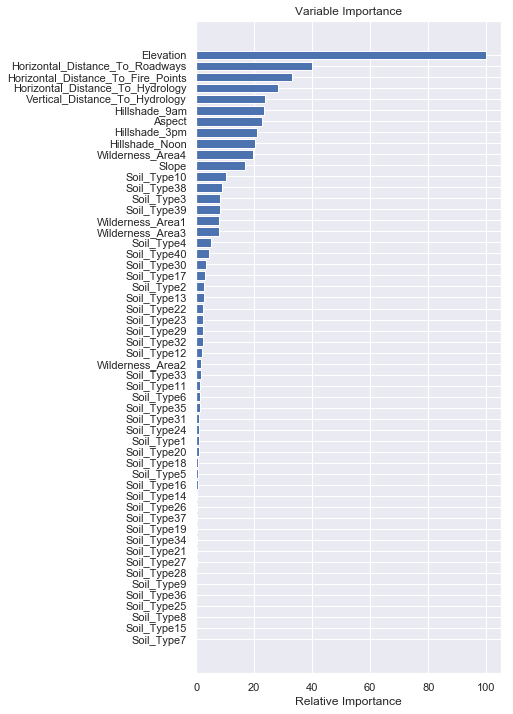

In [26]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

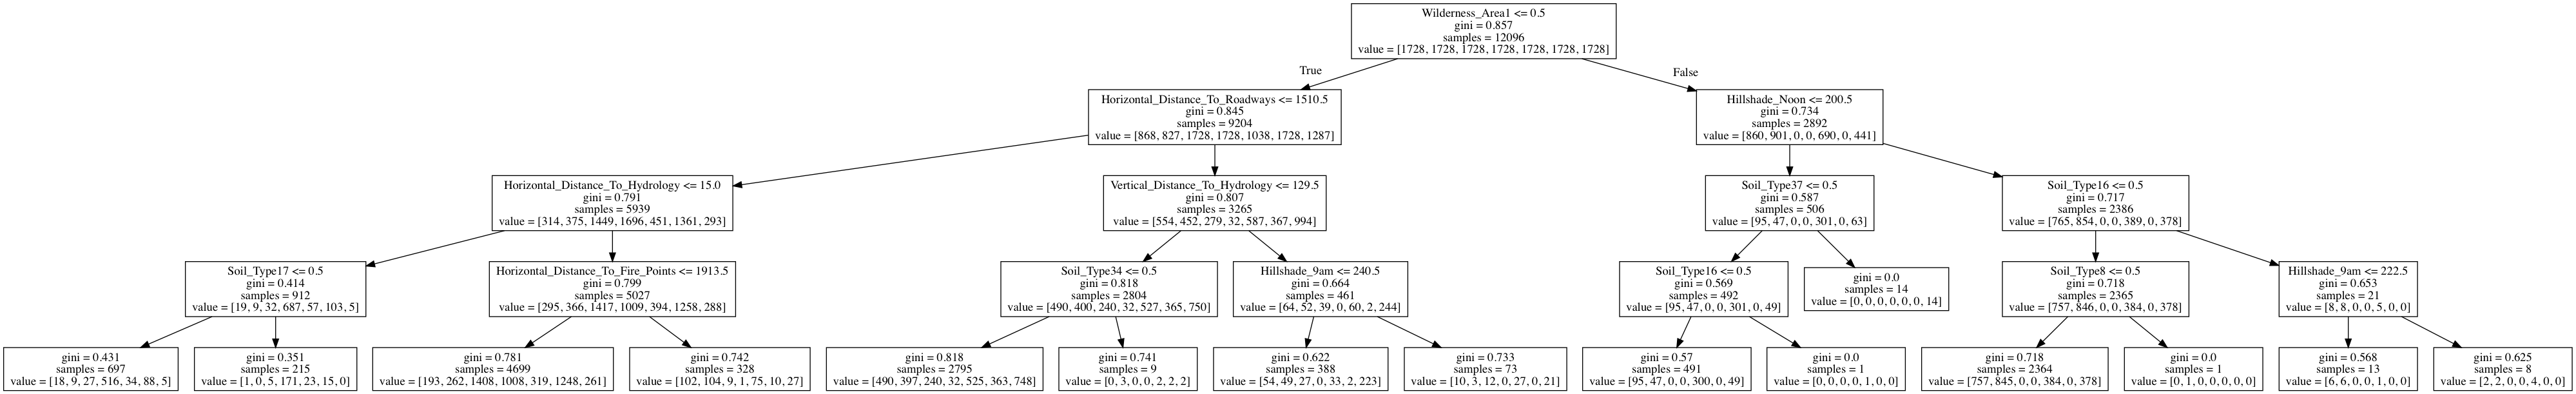

In [27]:
# decision tree
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

decision_tree = tree.DecisionTreeClassifier(
    criterion='gini',
    max_features=2,
    max_depth=4
)


decision_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X_train.columns,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Supervised learning model results

### Baseline model performance

Models have been tuned to optimize parameters for best test scores (accuracy).

Top performing model: And the winner is ... Random forest predicts forest cover type best! The best scoring model is random forest with an accuracy score of about 85% using 54 variables as inputs. Second place is kNN with a score of 80%. Third place goes to SVM with a score of 72%. Other models such as logistic regression and LASSO were also run, but had worse performance and are not shown here. kNN runs the fastest taking less than a second to train while random forest takes about 4 seconds and SVM takes a total 8 seconds. Logistic also took much longer closer to the one-minute range.


# Feature engineering

Let's use k-means, mean shift, and keywords from the soil types to add to our models and see if we can get any improvements from these baseline models.

Let's see if we can use k-means to get do some feature engineering to create a new feature based on the clusters made from k-means. We can use more than 7 clusters if that improves accuracy.

In [28]:
# add 50 clusters using k-means
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']


X_norm = normalize(X)
model = KMeans(n_clusters=50, random_state=42).fit(X_norm)
labels = model.labels_
df['labels'] = pd.DataFrame(labels)

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']
X_norm = normalize(X)

bandwidth = estimate_bandwidth(X_norm, quantile=0.01, n_samples=500, n_jobs=2)


ms = MeanShift(bandwidth=bandwidth, bin_seeding=True,  n_jobs=2).fit(X_norm)

labels_meanshift = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels_meanshift))

print("Number of estimated clusters: {}".format(n_clusters_))

df['labels_meanshift'] = pd.DataFrame(labels_meanshift)
# 61 clusters used as features for labels from mean shift

Number of estimated clusters: 61


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--- 4.14217209815979 seconds ---
              precision    recall  f1-score   support

           1       0.80      0.79      0.80       432
           2       0.80      0.67      0.73       432
           3       0.86      0.83      0.85       432
           4       0.94      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.84      0.90      0.87       432
           7       0.95      0.98      0.96       432

   micro avg       0.87      0.87      0.87      3024
   macro avg       0.87      0.87      0.87      3024
wei

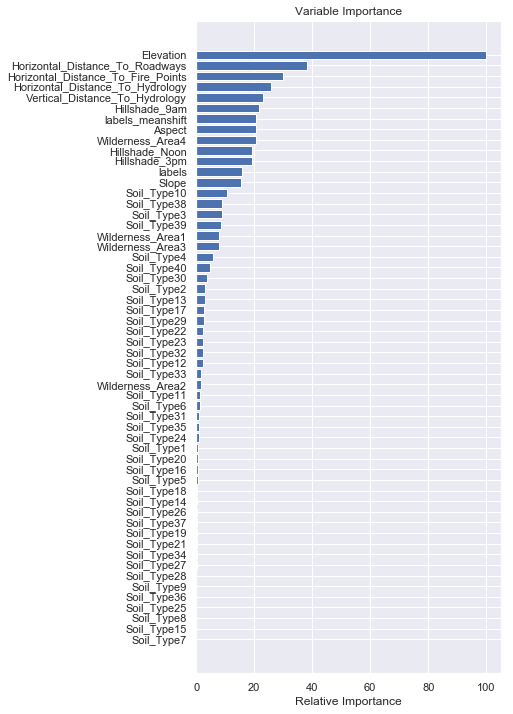

In [30]:
# make random forest

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)

rfc.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# very slight increase in score when labels from k-means and mean shift added as features

In [31]:
# add keywords from soil types

# The soil types are:
soil_dict = {
1: 'Cathedral family - Rock outcrop complex, extremely stony.',
2: 'Vanet - Ratake families complex, very stony.',
3: 'Haploborolis - Rock outcrop complex, rubbly.',
4: 'Ratake family - Rock outcrop complex, rubbly.',
5: 'Vanet family - Rock outcrop complex complex, rubbly.',
6: 'Vanet - Wetmore families - Rock outcrop complex, stony.',
7: 'Gothic family.',
8: 'Supervisor - Limber families complex.',
9: 'Troutville family, very stony.',
10: 'Bullwark - Catamount families - Rock outcrop complex, rubbly.',
11: 'Bullwark - Catamount families - Rock land complex, rubbly.',
12: 'Legault family - Rock land complex, stony.',
13: 'Catamount family - Rock land - Bullwark family complex, rubbly.',
14: 'Pachic Argiborolis - Aquolis complex.',
15: 'unspecified in the USFS Soil and ELU Survey.',
16: 'Cryaquolis - Cryoborolis complex.',
17: 'Gateview family - Cryaquolis complex.',
18: 'Rogert family, very stony.',
19: 'Typic Cryaquolis - Borohemists complex.',
20: 'Typic Cryaquepts - Typic Cryaquolls complex.',
21: 'Typic Cryaquolls - Leighcan family, till substratum complex.',
22: 'Leighcan family, till substratum, extremely bouldery.',
23: 'Leighcan family, till substratum - Typic Cryaquolls complex.',
24: 'Leighcan family, extremely stony.',
25: 'Leighcan family, warm, extremely stony.',
26: 'Granile - Catamount families complex, very stony.',
27: 'Leighcan family, warm - Rock outcrop complex, extremely stony.',
28: 'Leighcan family - Rock outcrop complex, extremely stony.',
29: 'Como - Legault families complex, extremely stony.',
30: 'Como family - Rock land - Legault family complex, extremely stony.',
31: 'Leighcan - Catamount families complex, extremely stony.',
32: 'Catamount family - Rock outcrop - Leighcan family complex, extremely stony.',
33: 'Leighcan - Catamount families - Rock outcrop complex, extremely stony.',
34: 'Cryorthents - Rock land complex, extremely stony.',
35: 'Cryumbrepts - Rock outcrop - Cryaquepts complex.',
36: 'Bross family - Rock land - Cryumbrepts complex, extremely stony.',
37: 'Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.',
38: 'Leighcan - Moran families - Cryaquolls complex, extremely stony.',
39: 'Moran family - Cryorthents - Leighcan family complex, extremely stony.',
40: 'Moran family - Cryorthents - Rock land complex, extremely stony.'
}

soil_dict

{1: 'Cathedral family - Rock outcrop complex, extremely stony.',
 2: 'Vanet - Ratake families complex, very stony.',
 3: 'Haploborolis - Rock outcrop complex, rubbly.',
 4: 'Ratake family - Rock outcrop complex, rubbly.',
 5: 'Vanet family - Rock outcrop complex complex, rubbly.',
 6: 'Vanet - Wetmore families - Rock outcrop complex, stony.',
 7: 'Gothic family.',
 8: 'Supervisor - Limber families complex.',
 9: 'Troutville family, very stony.',
 10: 'Bullwark - Catamount families - Rock outcrop complex, rubbly.',
 11: 'Bullwark - Catamount families - Rock land complex, rubbly.',
 12: 'Legault family - Rock land complex, stony.',
 13: 'Catamount family - Rock land - Bullwark family complex, rubbly.',
 14: 'Pachic Argiborolis - Aquolis complex.',
 15: 'unspecified in the USFS Soil and ELU Survey.',
 16: 'Cryaquolis - Cryoborolis complex.',
 17: 'Gateview family - Cryaquolis complex.',
 18: 'Rogert family, very stony.',
 19: 'Typic Cryaquolis - Borohemists complex.',
 20: 'Typic Cryaquep

In [32]:
# get soil types as just integer
df['soil_types_int'] = df['soil_types'].str.extract('(\d+)').astype(int) 

In [33]:
# put soil text description into df as lowercase
df['soil_type_text'] = df['soil_types_int'].map(soil_dict)
df['soil_type_text'].str.lower()

0        como - legault families complex, extremely stony.
1        como - legault families complex, extremely stony.
2               legault family - rock land complex, stony.
3        como family - rock land - legault family compl...
4        como - legault families complex, extremely stony.
5        como - legault families complex, extremely stony.
6        como - legault families complex, extremely stony.
7        como - legault families complex, extremely stony.
8        como - legault families complex, extremely stony.
9        como - legault families complex, extremely stony.
10                              rogert family, very stony.
11       como family - rock land - legault family compl...
12       como family - rock land - legault family compl...
13                              rogert family, very stony.
14                              rogert family, very stony.
15                       cryaquolis - cryoborolis complex.
16       como - legault families complex, extremely ston

In [34]:
# prepare string to obtain keywords
soil_string = '1 Cathedral family - Rock outcrop complex, extremely stony. 2 Vanet - Ratake families complex, very stony. 3 Haploborolis - Rock outcrop complex, rubbly. 4 Ratake family - Rock outcrop complex, rubbly. 5 Vanet family - Rock outcrop complex complex, rubbly. 6 Vanet - Wetmore families - Rock outcrop complex, stony. 7 Gothic family. 8 Supervisor - Limber families complex. 9 Troutville family, very stony. 10 Bullwark - Catamount families - Rock outcrop complex, rubbly. 11 Bullwark - Catamount families - Rock land complex, rubbly. 12 Legault family - Rock land complex, stony. 13 Catamount family - Rock land - Bullwark family complex, rubbly. 14 Pachic Argiborolis - Aquolis complex. 15 unspecified in the USFS Soil and ELU Survey. 16 Cryaquolis - Cryoborolis complex. 17 Gateview family - Cryaquolis complex. 18 Rogert family, very stony. 19 Typic Cryaquolis - Borohemists complex. 20 Typic Cryaquepts - Typic Cryaquolls complex. 21 Typic Cryaquolls - Leighcan family, till substratum complex. 22 Leighcan family, till substratum, extremely bouldery. 23 Leighcan family, till substratum - Typic Cryaquolls complex. 24 Leighcan family, extremely stony. 25 Leighcan family, warm, extremely stony. 26 Granile - Catamount families complex, very stony. 27 Leighcan family, warm - Rock outcrop complex, extremely stony. 28 Leighcan family - Rock outcrop complex, extremely stony. 29 Como - Legault families complex, extremely stony. 30 Como family - Rock land - Legault family complex, extremely stony. 31 Leighcan - Catamount families complex, extremely stony. 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony. 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony. 34 Cryorthents - Rock land complex, extremely stony. 35 Cryumbrepts - Rock outcrop - Cryaquepts complex. 36 Bross family - Rock land - Cryumbrepts complex, extremely stony. 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony. 38 Leighcan - Moran families - Cryaquolls complex, extremely stony. 39 Moran family - Cryorthents - Leighcan family complex, extremely stony. 40 Moran family - Cryorthents - Rock land complex, extremely stony.'

# remove numbers
soil_string = ''.join([i for i in soil_string if not i.isdigit()])
# remove dashes and punction
soil_string = soil_string.replace('-', '')
soil_string = soil_string.replace('.', '')
soil_string = soil_string.replace(',', '')
#remove common words that do not add any information
soil_string = soil_string.replace('complex', '')
soil_string = soil_string.replace('very', '')
soil_string = soil_string.replace('extremely', '')
soil_string = soil_string.replace('family', '')
soil_string = soil_string.replace('families', '')
soil_string = soil_string.replace('in', '')
soil_string = soil_string.replace(' the ', '')
soil_string = soil_string.replace(' and', '')

soil_string


' Cathedral   Rock outcrop   stony  Vanet  Ratake    stony  Haploborolis  Rock outcrop  rubbly  Ratake   Rock outcrop  rubbly  Vanet   Rock outcrop   rubbly  Vanet  Wetmore   Rock outcrop  stony  Gothic   Supervisor  Limber    Troutville   stony  Bullwark  Catamount   Rock outcrop  rubbly  Bullwark  Catamount   Rock land  rubbly  Legault   Rock land  stony  Catamount   Rock land  Bullwark   rubbly  Pachic Argiborolis  Aquolis   unspecified USFS Soil ELU Survey  Cryaquolis  Cryoborolis   Gateview   Cryaquolis   Rogert   stony  Typic Cryaquolis  Borohemists   Typic Cryaquepts  Typic Cryaquolls   Typic Cryaquolls  Leighcan  till substratum   Leighcan  till substratum  bouldery  Leighcan  till substratum  Typic Cryaquolls   Leighcan   stony  Leighcan  warm  stony  Granile  Catamount    stony  Leighcan  warm  Rock outcrop   stony  Leighcan   Rock outcrop   stony  Como  Legault    stony  Como   Rock land  Legault    stony  Leighcan  Catamount    stony  Catamount   Rock outcrop  Leighcan    s

In [35]:
# now we have the soil type next in our dataframe YAY!
# make features from this text and add features to random forest, knn, and neural network models (MLP and CNN)

# make a list of each word and filter out if str is empty
keywords = soil_string.split(' ')
keywords = list(filter(None, keywords))
# remove repeated words
keywords = list(set(keywords))
# make everything lowercase
keywords = [i.lower() for i in keywords]
# add n_grams
top_ngrams = ['rock outcrop', 'rock land', 'till substratum']
keywords = keywords + top_ngrams
print(keywords)

['limber', 'rock', 'leighcan', 'usfs', 'cryorthents', 'bross', 'como', 'ratake', 'till', 'cryoborolis', 'granile', 'unspecified', 'gateview', 'bouldery', 'supervisor', 'rubbly', 'cryaquolls', 'substratum', 'cryaquepts', 'warm', 'rogert', 'stony', 'elu', 'argiborolis', 'cryumbrepts', 'catamount', 'troutville', 'moran', 'gothic', 'haploborolis', 'borohemists', 'legault', 'cathedral', 'pachic', 'bullwark', 'vanet', 'soil', 'typic', 'wetmore', 'cryaquolis', 'outcrop', 'aquolis', 'land', 'survey', 'rock outcrop', 'rock land', 'till substratum']


In [36]:
# make keywords features in df
for key in keywords:
    df[str(key)] = (df.soil_type_text.str.contains(
        str(key),
        case=False)
    )
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,typic,wetmore,cryaquolis,outcrop,aquolis,land,survey,rock outcrop,rock land,till substratum
0,1,2596,51,3,258,0,510,221,232,148,...,False,False,False,False,False,False,False,False,False,False
1,2,2590,56,2,212,-6,390,220,235,151,...,False,False,False,False,False,False,False,False,False,False
2,3,2804,139,9,268,65,3180,234,238,135,...,False,False,False,False,False,True,False,False,True,False
3,4,2785,155,18,242,118,3090,238,238,122,...,False,False,False,False,False,True,False,False,True,False
4,5,2595,45,2,153,-1,391,220,234,150,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#convert bool to int
for col in (df.iloc[:, 62:109]).columns:
    df[col] = (df[col] == True).astype(int)
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,typic,wetmore,cryaquolis,outcrop,aquolis,land,survey,rock outcrop,rock land,till substratum
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,1,0,0,1,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,1,0,0,1,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--- 3.8571813106536865 seconds ---
              precision    recall  f1-score   support

           1       0.78      0.77      0.78       432
           2       0.79      0.66      0.72       432
           3       0.85      0.81      0.83       432
           4       0.93      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.84      0.89      0.86       432
           7       0.94      0.97      0.96       432

   micro avg       0.86      0.86      0.86      3024
   macro avg       0.86      0.86      0.86      3024
w

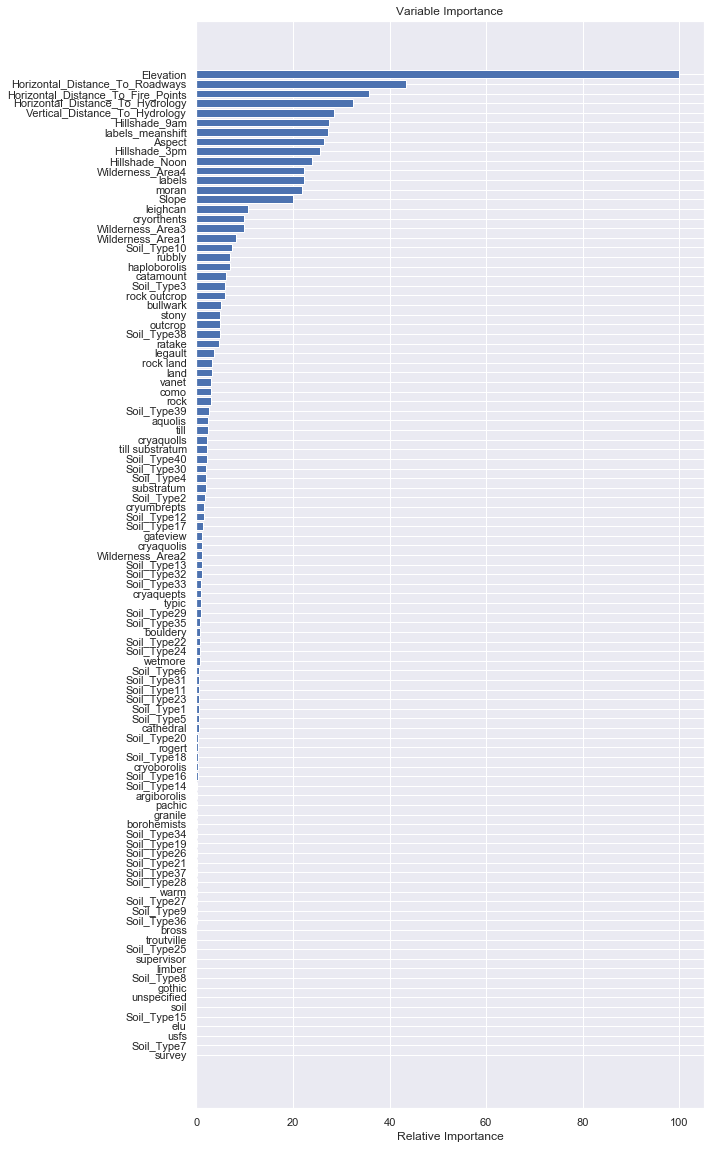

In [38]:
# random forest with k-means, mean shift, and soil text keywords

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 'soil_types_int', 'soil_type_text'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)

rfc.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##  K-means, mean shift, and soil text to improve Random forest 

So far our best performing baseline model is random forest with about 85% accuracy on the testing set. Adding k-means labels, mean_shift labels, and Natural language processing features improve accuracy scores only slightly to about 87%.

## Moving on to neural networks

Let's see if neural networks (multilayer perceptrons and convolutional neural networks) can outperform random forest.

In [39]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.models import Model

from keras import backend as K

In [41]:
# get data ready for neural net

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 'soil_types_int', 'soil_type_text'], 1)
y = df['Cover_Type']

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

X = X.values
X = X.astype('float32')

y = y.values
y = y.astype('float32')

# split into testing and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler.fit(X_train)
X_train = scaler.transform(X_train) 

scaler.fit(X_test)
X_test = scaler.transform(X_test)

# encode class values as integers
# get y_train into form keras can use
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_train = np_utils.to_categorical(encoded_Y)

# get y_test into form keras can use

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_test = np_utils.to_categorical(encoded_Y)

In [42]:
#mlp - gets score in 80 without text features
model = Sequential()
model.add(Dense(1024, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.summary()
model.compile(loss='logcosh',
              optimizer='Adam',
              metrics=['accuracy'])
import time
start_time = time.time()

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(X_test)
y_pred = (predictions > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# slight improvement here Test accuracy: 0.8207671957671958 compared to ~0.80 before

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              106496    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)  

Epoch 44/100
12096/12096 [==============================] - 4s 315us/step - loss: 0.0196 - acc: 0.7989 - val_loss: 0.0190 - val_acc: 0.8082
Epoch 45/100
12096/12096 [==============================] - 4s 307us/step - loss: 0.0196 - acc: 0.7954 - val_loss: 0.0189 - val_acc: 0.8115
Epoch 46/100
12096/12096 [==============================] - 4s 292us/step - loss: 0.0193 - acc: 0.8022 - val_loss: 0.0191 - val_acc: 0.8056
Epoch 47/100
12096/12096 [==============================] - 3s 264us/step - loss: 0.0193 - acc: 0.8062 - val_loss: 0.0194 - val_acc: 0.8059
Epoch 48/100
12096/12096 [==============================] - 3s 273us/step - loss: 0.0192 - acc: 0.8020 - val_loss: 0.0188 - val_acc: 0.8082
Epoch 49/100
12096/12096 [==============================] - 3s 267us/step - loss: 0.0192 - acc: 0.8022 - val_loss: 0.0191 - val_acc: 0.8092
Epoch 50/100
12096/12096 [==============================] - 3s 263us/step - loss: 0.0192 - acc: 0.8028 - val_loss: 0.0184 - val_acc: 0.8151
Epoch 51/100
12096/1

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [43]:
# convolution neural network

print(X_train.shape)
print(X_test.shape)

X_train_reshape = np.reshape(X_train, (12096, X.shape[1], 1))
X_test_reshape = np.reshape(X_test, (3024, X.shape[1], 1))

print(X_train_reshape.shape)
print(X_test_reshape.shape)


model = Sequential()
model.add(Conv1D(128, (3), input_shape=(X.shape[1],1), activation='relu')) 
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu')) 
model.add(Dense(7, activation='softmax'))

 
model.compile(loss='logcosh',
              optimizer='Adam',
              metrics=['accuracy'])
import time
start_time = time.time()

history = model.fit(X_train_reshape, y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test_reshape, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

score = model.evaluate(X_test_reshape, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(X_test_reshape)
y_pred = (predictions > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

(12096, 103)
(3024, 103)
(12096, 103, 1)
(3024, 103, 1)
Train on 12096 samples, validate on 3024 samples
Epoch 1/10
12096/12096 [==============================] - 11s 924us/step - loss: 0.0358 - acc: 0.5844 - val_loss: 0.0328 - val_acc: 0.6329
Epoch 2/10
12096/12096 [==============================] - 8s 690us/step - loss: 0.0315 - acc: 0.6467 - val_loss: 0.0309 - val_acc: 0.6505
Epoch 3/10
12096/12096 [==============================] - 8s 624us/step - loss: 0.0297 - acc: 0.6636 - val_loss: 0.0288 - val_acc: 0.6733
Epoch 4/10
12096/12096 [==============================] - 7s 613us/step - loss: 0.0283 - acc: 0.6868 - val_loss: 0.0277 - val_acc: 0.6921
Epoch 5/10
12096/12096 [==============================] - 8s 654us/step - loss: 0.0273 - acc: 0.7006 - val_loss: 0.0268 - val_acc: 0.7140
Epoch 6/10
12096/12096 [==============================] - 7s 595us/step - loss: 0.0264 - acc: 0.7122 - val_loss: 0.0268 - val_acc: 0.7116
Epoch 7/10
12096/12096 [==============================] - 7s 608us

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [44]:
# from tuning parameters: activation function - not big diff - so stick with 'relu'
# batch_size 32
# epochs more is better up to a point
# optimizer 'Adam' is better
# dropout can be lower like 0.2
# neurons

# 50 epochs worse than 30, third conv1d layer worse than just 2 layers
# conv1d second to 128?
model = Sequential()
model.add(Conv1D(128, (3), input_shape=(X.shape[1],1), activation='relu')) 
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, (3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(7, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
import time
start_time = time.time()

history = model.fit(X_train_reshape, y_train,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test_reshape, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

score = model.evaluate(X_test_reshape, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(X_test_reshape)
y_pred = (predictions > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

Train on 12096 samples, validate on 3024 samples
Epoch 1/30
12096/12096 [==============================] - 17s 1ms/step - loss: 0.9435 - acc: 0.6145 - val_loss: 0.8389 - val_acc: 0.6531
Epoch 2/30
12096/12096 [==============================] - 15s 1ms/step - loss: 0.7882 - acc: 0.6737 - val_loss: 0.7857 - val_acc: 0.6749
Epoch 3/30
12096/12096 [==============================] - 14s 1ms/step - loss: 0.7245 - acc: 0.7001 - val_loss: 0.7138 - val_acc: 0.7017
Epoch 4/30
12096/12096 [==============================] - 14s 1ms/step - loss: 0.6647 - acc: 0.7255 - val_loss: 0.6552 - val_acc: 0.7351
Epoch 5/30
12096/12096 [==============================] - 15s 1ms/step - loss: 0.6294 - acc: 0.7407 - val_loss: 0.6273 - val_acc: 0.7480
Epoch 6/30
12096/12096 [==============================] - 13s 1ms/step - loss: 0.5942 - acc: 0.7535 - val_loss: 0.6162 - val_acc: 0.7447
Epoch 7/30
12096/12096 [==============================] - 14s 1ms/step - loss: 0.5678 - acc: 0.7671 - val_loss: 0.5860 - val_acc:

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [45]:
# from tuning parameters: activation function - not big diff - so stick with 'relu'
# batch_size 32
# epochs more is better up to a point
# optimizer 'Adam' is better
# dropout can be lower like 0.2
# neurons

# 50 epochs worse than 30, third conv1d layer worse than just 2 layers
# conv1d second to 128?
model = Sequential()
model.add(Conv1D(128, (3), input_shape=(X.shape[1],1), activation='relu')) 
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, (3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

 
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
import time
start_time = time.time()

history = model.fit(X_train_reshape, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test_reshape, y_test))

print("--- %s seconds ---" % (time.time() - start_time))

score = model.evaluate(X_test_reshape, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

predictions = model.predict(X_test_reshape)
y_pred = (predictions > 0.5)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)


from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

Train on 12096 samples, validate on 3024 samples
Epoch 1/100
12096/12096 [==============================] - 16s 1ms/step - loss: 1.0314 - acc: 0.5836 - val_loss: 0.8733 - val_acc: 0.6319
Epoch 2/100
12096/12096 [==============================] - 15s 1ms/step - loss: 0.8610 - acc: 0.6453 - val_loss: 0.7895 - val_acc: 0.6663
Epoch 3/100
12096/12096 [==============================] - 15s 1ms/step - loss: 0.7914 - acc: 0.6692 - val_loss: 0.7585 - val_acc: 0.6660
Epoch 4/100
12096/12096 [==============================] - 15s 1ms/step - loss: 0.7461 - acc: 0.6898 - val_loss: 0.6921 - val_acc: 0.7130
Epoch 5/100
12096/12096 [==============================] - 15s 1ms/step - loss: 0.7073 - acc: 0.6974 - val_loss: 0.6839 - val_acc: 0.7269
Epoch 6/100
12096/12096 [==============================] - 19s 2ms/step - loss: 0.6795 - acc: 0.7186 - val_loss: 0.6509 - val_acc: 0.7255
Epoch 7/100
12096/12096 [==============================] - 17s 1ms/step - loss: 0.6546 - acc: 0.7269 - val_loss: 0.6443 - v

12096/12096 [==============================] - 16s 1ms/step - loss: 0.3133 - acc: 0.8769 - val_loss: 0.4842 - val_acc: 0.8294
Epoch 60/100
12096/12096 [==============================] - 19s 2ms/step - loss: 0.3119 - acc: 0.8718 - val_loss: 0.4779 - val_acc: 0.8241
Epoch 61/100
12096/12096 [==============================] - 19s 2ms/step - loss: 0.3135 - acc: 0.8757 - val_loss: 0.4883 - val_acc: 0.8218
Epoch 62/100
12096/12096 [==============================] - 18s 1ms/step - loss: 0.3083 - acc: 0.8748 - val_loss: 0.4747 - val_acc: 0.8254
Epoch 63/100
12096/12096 [==============================] - 16s 1ms/step - loss: 0.3101 - acc: 0.8766 - val_loss: 0.4775 - val_acc: 0.8254
Epoch 64/100
12096/12096 [==============================] - 17s 1ms/step - loss: 0.2971 - acc: 0.8783 - val_loss: 0.4805 - val_acc: 0.8290
Epoch 65/100
12096/12096 [==============================] - 17s 1ms/step - loss: 0.3024 - acc: 0.8765 - val_loss: 0.4778 - val_acc: 0.8257
Epoch 66/100
12096/12096 [==============

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Random forest beats neural network

After optimizing the neural network models, final scores are just over 80%. They are not able to beat random forest. This is likely due to random forest being better able to detect patterns in the dataset where neural networks need larger samples (more than the 15120 rows here). Also, note that neural networks and random forest have the most difficulty detecting cover type 2. Overall as seen in the exploration of the dataset, many of the variables overlap in range for all cover types making distinctions between classes difficult.

In addition, we can see that by using only the following 6 features: Elevation, Hillshade at 9 am, horizontal distance to roads, horizontal distance to fire points, horizontal and vertical distance to water in our model, we can still obtain scores of 83% using random forest.

Finally, the last models to look at are a combination of boosted tree and random forest to see if combining the two models can improve scores at all.

In [46]:
# # make random forest

# X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 
#              'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
#        'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
#        'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
#        'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
#        'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
#        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
#        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
#        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
#        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
#        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
#        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
#             'Slope', 'Hillshade_Noon', 'Hillshade_3pm', 'Aspect'], 1)
# y = df['Cover_Type']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# import time
# start_time = time.time()

# from sklearn import ensemble
# rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
# print(rfc)

# rfc.fit(X_train, y_train)

# print("--- %s seconds ---" % (time.time() - start_time))

# from sklearn.metrics import classification_report
# y_pred = rfc.predict(X_test)
# print(classification_report(y_test, y_pred))

# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

# feature_importance = rfc.feature_importances_

# # Make importances relative to max importance.
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.figure(figsize=(5,5))
# plt.subplot(1, 2, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
# plt.show()

In [47]:
# add voting classifier with boosted tree and random forest

# add prediction using Dash? or something else some api

# 100 n_estimator 0.7572751322751323

# gradient boosting again

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 'soil_types_int', 'soil_type_text'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from sklearn import ensemble
params = {'n_estimators': 100,
          'max_depth': 4,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
print(clf)

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)


# voting classifier

import time
start_time = time.time()

from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('rfc', rfc), ('boosted_tree', clf)],
                        voting='hard', weights=[3, 1])

eclf.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))


from sklearn.metrics import classification_report
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# try soft
# did weight 1 1 got 85
#did weight 2 1 got 86

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--- 118.3749361038208 seconds ---

In [48]:
df10.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
--- 12.456501007080078 seconds ---
              precision    recall  f1-score   support

           1       0.77      0.72      0.75       432
           2       0.76      0.60      0.67       432
           3       0.77      0.81      0.79       432
           4       0.95      0.95      0.95       432
           5       0.86      0.94      0.90       432
           6       0.81      0.83      0.82       432
           7       0.90      0.98      0.94       432

   micro avg       0.83      0.83      0.83      3024
   macro avg       0.83      0.83      0.83      3024
w

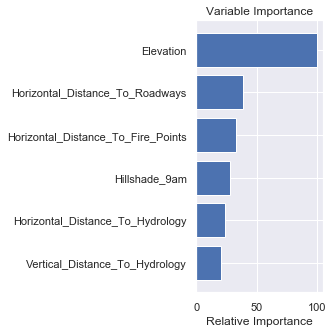

In [49]:
# make random forest

X = df[['Elevation', 'Hillshade_9am', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Fire_Points', 'Horizontal_Distance_To_Roadways']]
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

import time
start_time = time.time()

from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)

rfc.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [50]:
#rfc.predict([X_test.iloc[0, :].values])
#[X_train.iloc[0, :].values]

input_string = (input('Enter a list element separated by space :'))
list_ = (input_string).split()
list_ = [int(x) for x in list_]
list_

Enter a list element separated by space :2000 50 500 200 100 300


[2000, 50, 500, 200, 100, 300]

In [51]:
list_ = np.array(list_)
rfc.fit(X_train, y_train)
rfc.predict([list_])

array([3])

# Error analysis

Here I am interested in looking at the best random forest model and seeing what is happening with class 2 predictions.

In [52]:
# error analysis of random forest

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 'soil_types_int', 'soil_type_text'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(criterion='gini', n_estimators=325, n_jobs=2)
print(rfc)

rfc.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

           1       0.79      0.78      0.79       432
           2       0.80      0.67      0.73       432
           3       0.85      0.82      0.83       432
           4       0.94      0.98      0.96       432
           5       0.89      0.95      0.92       432
           6       0.83      0.90      0.86       432
           7       0.94      0.97      0.96       432

   micro avg       0.87      0.87      0.87      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.87   

In [53]:
# look at training set predictions
print(X_train.shape)
y_pred_train = rfc.predict(X_train)
print(len(y_pred_train))

(12096, 103)
12096


In [54]:
# make a new label in X_test that shows prediction
X_test2 = X_test
X_test2['y_pred'] = rfc.predict(X_test)
X_test2.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,wetmore,cryaquolis,outcrop,aquolis,land,survey,rock outcrop,rock land,till substratum,y_pred
3551,2311,102,25,525,17,1392,252,199,59,947,...,0,0,0,0,0,0,0,0,0,4
5928,2315,315,18,134,28,1500,170,223,192,660,...,0,0,1,0,0,0,1,0,0,6
13057,2276,91,16,0,0,1072,243,212,93,1201,...,0,0,1,0,0,0,1,0,0,4
2815,2797,174,23,272,91,600,226,245,138,577,...,0,0,0,0,1,0,0,1,0,5
12192,2038,15,3,0,0,700,217,233,154,691,...,0,1,0,1,0,0,0,0,0,4


In [55]:
# look at df with rfc.predict(X_train and/or X_test) to compare y_pred and cover type or add cover type to table above

# let's look at the whole df

X = df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas', 'soil_types_int', 'soil_type_text'], 1)
y = df['Cover_Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

df2 = df
df2['y_pred'] = rfc.predict(df.drop(['Cover_Type', 'Id', 'soil_types', 'wild_areas',
                                     'soil_types_int', 'soil_type_text'], 1))
df2.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,wetmore,cryaquolis,outcrop,aquolis,land,survey,rock outcrop,rock land,till substratum,y_pred
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,1,0,0,1,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,1,0,0,1,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [56]:
# can we create another new column based on if y_pred == Cover_Type, then plot only those?
# or look at only class two -- do this
# make new dateframe with only class two
# use df query
#df_type_2 = df.groupby('Cover_Type')
df_type_2 = df.query('Cover_Type == 2')
df_type_2.head()



,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,wetmore,cryaquolis,outcrop,aquolis,land,survey,rock outcrop,rock land,till substratum,y_pred
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,1,0,0,1,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,1,0,0,1,0,2
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
11,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,1,0,0,1,0,2
12,13,2742,134,22,150,69,3215,248,224,92,...,0,0,0,0,1,0,0,1,0,2


In [57]:
len(df_type_2)

2160

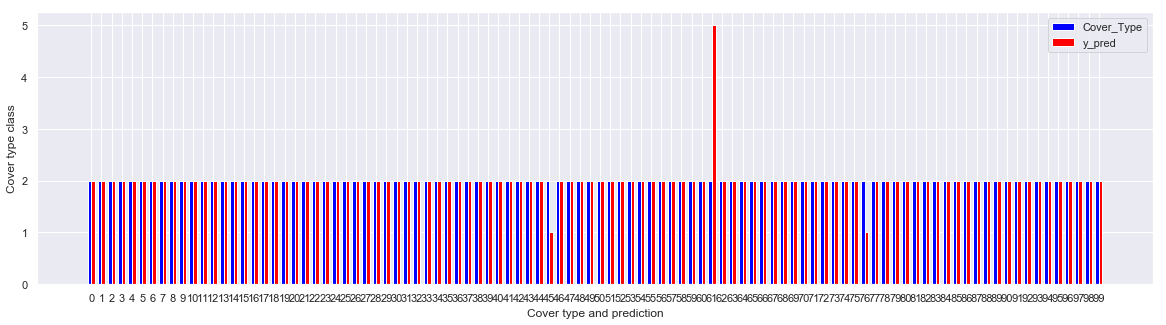

In [58]:
dfa = df_type_2.iloc[200:300, :]
ind = np.arange(len(dfa))
width = 0.35
fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind - width/2, dfa.Cover_Type, width, color='Blue', label='Cover_Type')
rects2 = ax.bar(ind + width/2, dfa.y_pred, width, color='Red', label='y_pred')
ax.set_ylabel('Cover type class')
ax.set_xlabel('Cover type and prediction')
ax.set_xticks(ind)

ax.legend()
plt.show()

In [59]:
df_type_2.y_pred.value_counts()

2    2018
1      75
5      32
6      18
3      13
7       4
Name: y_pred, dtype: int64

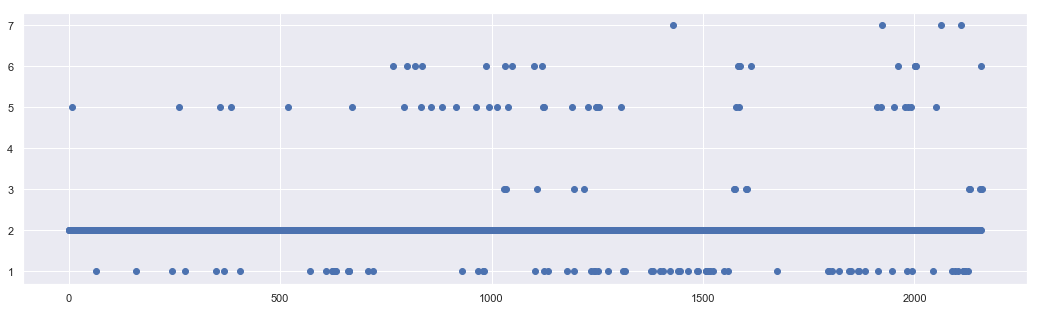

In [60]:
plt.figure(figsize=(18,5))
plt.scatter(x=np.arange(len(df_type_2)), y=df_type_2.y_pred)
plt.show()

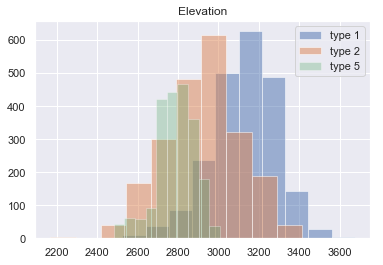

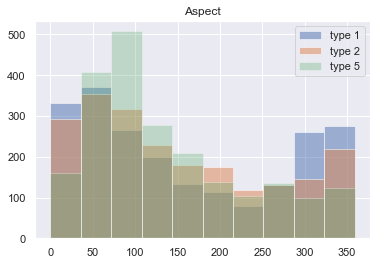

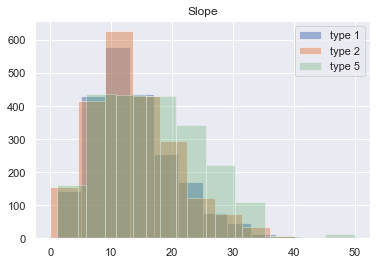

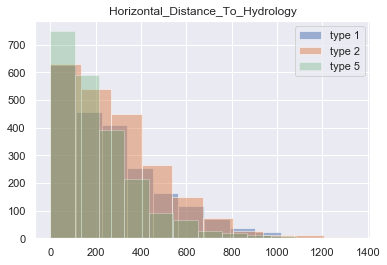

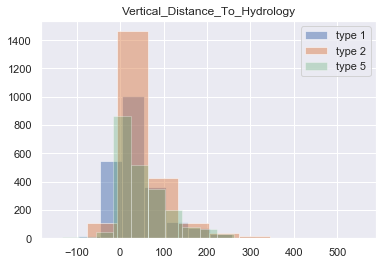

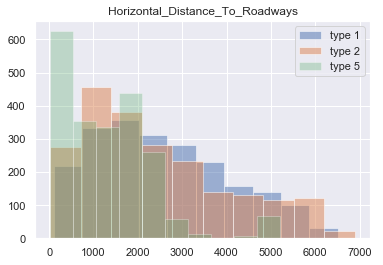

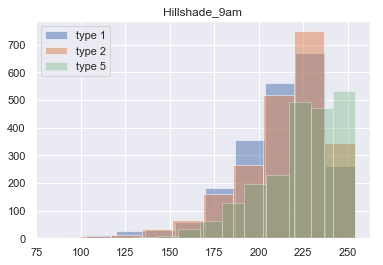

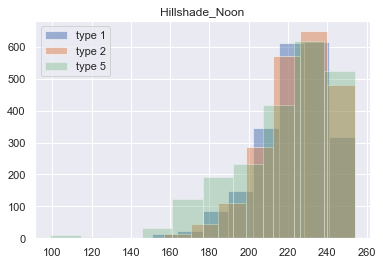

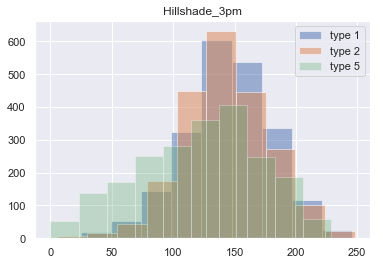

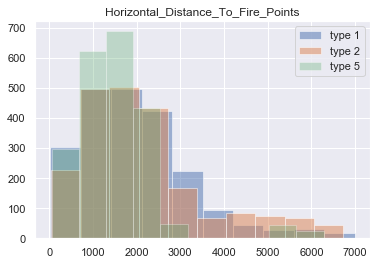

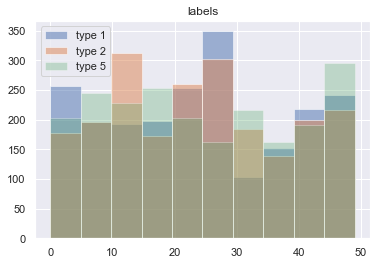

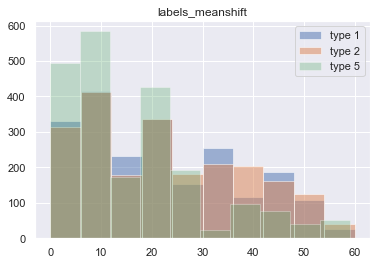

In [63]:
df_type_1 = df.query('Cover_Type == 1')

df_type_5 = df.query('Cover_Type == 5')

for col in df_type_1.iloc[:, 1:11].columns: #labels_meanshift
    plt.hist(df_type_1[col], alpha=0.5, label='type 1')
    plt.hist(df_type_2[col], alpha=0.5, label='type 2')
    plt.hist(df_type_5[col], alpha=0.3, label='type 5')
    plt.title(col)
    plt.legend()
    plt.show()
for col in df_type_1.iloc[:, 58:60].columns:
    plt.hist(df_type_1[col], alpha=0.5, label='type 1')
    plt.hist(df_type_2[col], alpha=0.5, label='type 2')
    plt.hist(df_type_5[col], alpha=0.3, label='type 5')
    plt.title(col)
    plt.legend()
    plt.show()

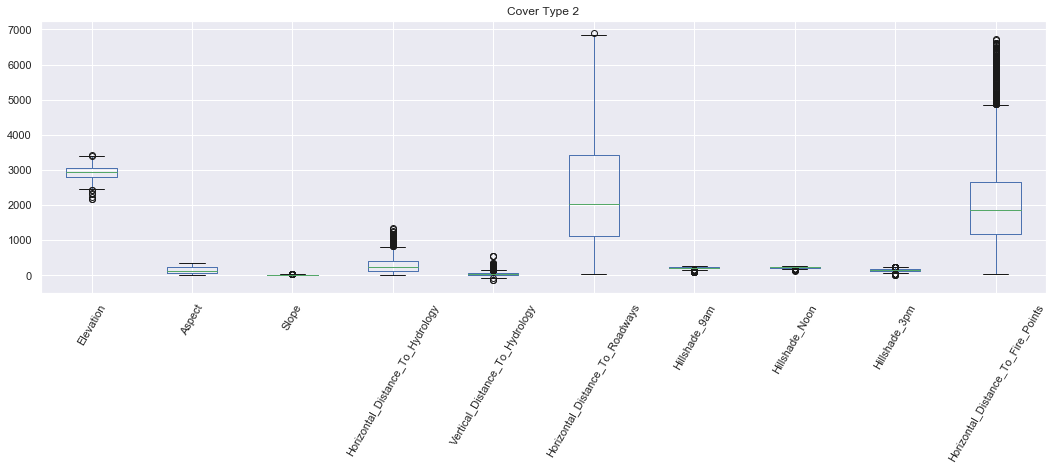

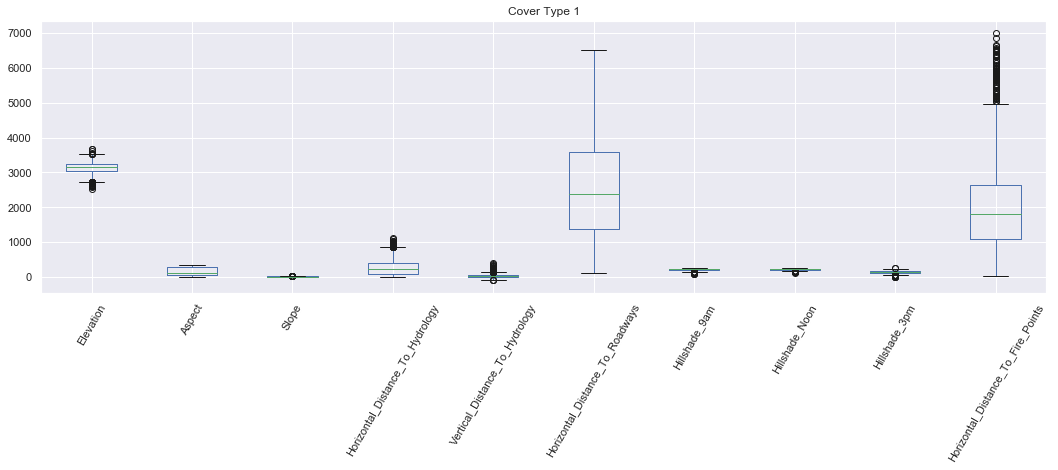

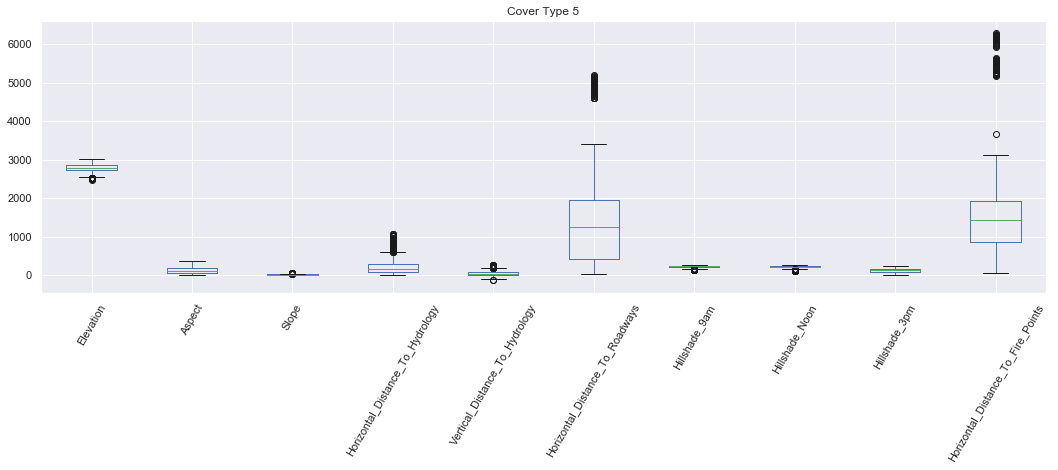

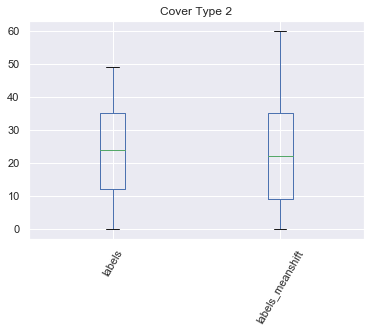

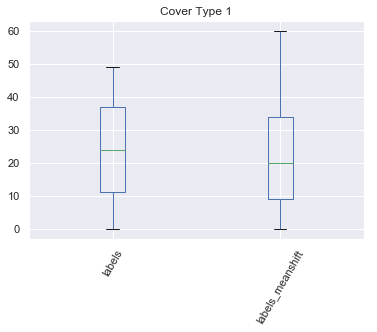

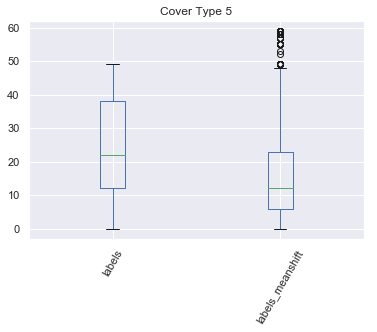

In [65]:
# sns.boxplot(x=df_type_1['Elevation'], y='Elevation', data=df_type_1)
# plt.show()
plt.figure(figsize=(18,5))
df_type_2.iloc[:, 1:11].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 2')
plt.show()
plt.figure(figsize=(18,5))
df_type_1.iloc[:, 1:11].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 1')
plt.show()
plt.figure(figsize=(18,5))
df_type_5.iloc[:, 1:11].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 5')
plt.show()

df_type_2.iloc[:, 58:60].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 2')
plt.show()
df_type_1.iloc[:, 58:60].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 1')
plt.show()
df_type_5.iloc[:, 58:60].boxplot()
plt.xticks(rotation=60)
plt.title('Cover Type 5')
plt.show()

### Error analysis

We know that cover type 2 has the lowest f1-score for the best model (Random forest), so I wanted to look at what cover type the model predicts most often instead of class 2. The model predicts class 1 most frequently for a count of 75 out of 2160 total counts for class 2. We also know that for this random forest model, the most important features are the 10 cartographic variables and the 2 label features. I plotted the distributions using boxplots and histograms of these features to show the similarities between class 2 and 1 and less likeness between class 2 and 5.

# Conclusions

After building and comparing many supervised learning models, random forest is the overall best performer because of its high accuracy score and relatively quick learning time. As discussed earlier, random forest has the highest scores with over 100 features including the original cartographic variables, NLP features from soil type descriptions, and clustered grouping labels from k-means and mean shift. The random forest model learns by asking questions about the dataset. A decision tree is shown as an example to illustrate the types of questions the model asks of the dataset; is Elevation <= 2000?. The process of asking questions of repeated on different subsets of the data using different features, which is referred to as bagging minimizing overfitting.

This random forest cover type predictor is capable of predicting forest cover type pretty well (~87 accuracy) from a balanced testing set and can be used to solve issues related to land management, inventory, and forest health. After collecting necessary variables such as Elevation and specific distances, this model could be used to predict forest cover types in other geographic areas and help to reduce use of resources including time and money for land management. To use this model for land management purposed in a production environment, databased for storing the cartographic information and possibly images should be created and managed, a data scientist should work on specific locations to build relevant models to predict cover types in that area, and the results of the models should be used by different organizations, governments, or companies to give a better understanding of their forest resources and then how to allocate those resources or make some decisions given the outcomes of the model as well as users who could input their own data as a crowdsourcing app. By opening the app to the general public, more data could be collected from many sources ideally improving the accuracy of the predictions.

Once models have been built and are in production, maintenance on the system overall would be on databases and collecting new data. The model could be rerun every month or couple of months and the performance of the model should be monitored over time. Further work could be done to improve predictions based on what the land management organizations need to utilize the predictions for.

## Future Work

Ideally, to improve the predictive power of the models, adding more samples to the dataset will allow models to train and learn more and predict with higher accuracy. Other data forms such as satellite images along with elevation and cartographic variables may be used to predict forest cover types globally using similar models such as neural networks.

Another way to improve predictions would be to create a model that only predicts Cover_Type 2 or not. Building this model would be helpful because the current models predict class 2 with the lowest f1 scores. After building these, we could incorporate both models together through merging using the first model as a filter for Class 2 before using the full model to capture more of Class 2.

I started using Dash and plotly to implement interactive 3d visualizations of some features and cover type. More visualization could be added to show many combinations of 3 variables with cover type. In addition, a user input interface could be added so the user could add their data and predict the cover type using the random forest model with only 6 numeric inputs as variables as opposed to 54.

In addition, further work could be done on the neural network to improve its predict power by continuing to tune the parameters by adding layers and tuning the hyperparameters as well.